## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedades y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz una pequeña evaluación previa de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
def check_df(df):
    info_df = pd.DataFrame({
        'Tipo': df.dtypes,
        'No Nulos': df.count(),
        'Nulos': df.isnull().sum(),
        '% Nulos': (df.isnull().sum() / len(df)) * 100,
        'Memoria (MB)': df.memory_usage(deep=True).drop('Index') / 1024**2
    })
    return info_df

In [3]:
df = pd.read_csv("./data/wines_dataset.csv", sep="|")

display(check_df(df))

,Tipo,No Nulos,Nulos,% Nulos,Memoria (MB)
fixed acidity,float64,6497,0,0.0,0.049568
volatile acidity,float64,6497,0,0.0,0.049568
citric acid,float64,6497,0,0.0,0.049568
residual sugar,float64,6497,0,0.0,0.049568
chlorides,float64,6497,0,0.0,0.049568
free sulfur dioxide,float64,6497,0,0.0,0.049568
total sulfur dioxide,float64,6497,0,0.0,0.049568
density,float64,6497,0,0.0,0.049568
pH,float64,6497,0,0.0,0.049568
sulphates,float64,6497,0,0.0,0.049568


In [4]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,NaN,NaN,NaN,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9
volatile acidity,6497.0,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497.0,NaN,NaN,NaN,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66
residual sugar,6497.0,NaN,NaN,NaN,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,NaN,NaN,NaN,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.0,NaN,NaN,NaN,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0
total sulfur dioxide,6497.0,NaN,NaN,NaN,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,NaN,NaN,NaN,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,NaN,NaN,NaN,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,NaN,NaN,NaN,0.531268,0.148806,0.22,0.43,0.51,0.6,2.0


In [5]:
display(df.head(20))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.210,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.160,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.180,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.630,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
5,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white
6,6.6,0.210,0.31,11.40,0.039,46.0,165.0,0.99795,3.41,0.44,9.8,7,white
7,6.7,0.310,0.30,2.10,0.038,18.0,130.0,0.99280,3.36,0.63,10.6,6,white
8,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.5,5,red
9,7.5,0.420,0.20,1.40,0.060,15.0,168.0,0.99440,3.06,0.40,9.4,6,white


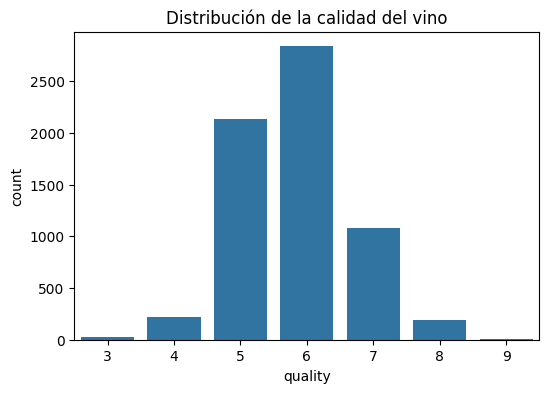

In [6]:
#Distribución de los targets

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df)
plt.title("Distribución de la calidad del vino")
plt.show()


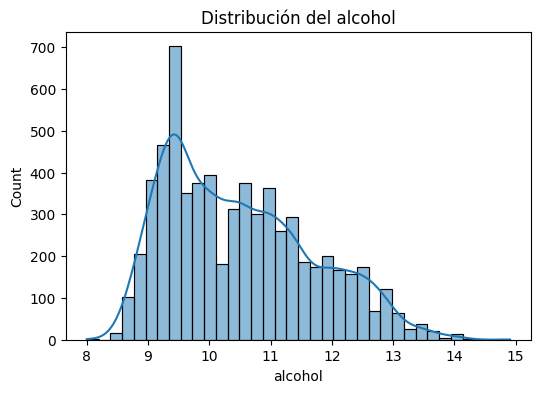

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["alcohol"], kde=True)
plt.title("Distribución del alcohol")
plt.show()


In [8]:
#Preparación de datos común
df["class"] = df["class"].map({"red": 0, "white": 1})


### #2 Modelado para clasificación

In [9]:
#Definición de X e y
target_clf = "quality"

X = df.drop(columns=[target_clf])
y = df[target_clf]


In [10]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [11]:
#Escalado
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


El objetivo de este primer problema es predecir la calidad del vino como un problema de clasificación multiclase.
Dado que las clases de calidad no están equilibradas y que el objetivo de negocio es clasificar correctamente, en media, todas las calidades de vino, se ha elegido como métrica principal el recall macro, que penaliza de igual manera los errores en clases mayoritarias y minoritarias.

In [12]:
#Modelo baseline: KNN

knn_5 = KNeighborsClassifier(n_neighbors=5)

scores_knn_5 = cross_val_score(
    knn_5,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="recall_macro"
)

print(scores_knn_5.mean())


h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.2801134881121358


In [13]:
knn_11 = KNeighborsClassifier(n_neighbors=11)

scores_knn_11 = cross_val_score(
    knn_11,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="recall_macro"
)

print(scores_knn_11.mean())


h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.2513314716487068


Se han probado distintos valores de K (5 y 11) para observar su impacto en el recall macro medio mediante validación cruzada.

Los resultados muestran un rendimiento limitado, especialmente en clases poco representadas, lo que es coherente con la sensibilidad del KNN al desbalanceo de clases y a la densidad de datos en el espacio de características.

In [14]:
#Regresión Logística

lr = LogisticRegression(max_iter=5000)

scores_lr = cross_val_score(
    lr,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="recall_macro"
)

print(scores_lr.mean())


h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.24123337963817618


In [15]:
#Random Forest

rf = RandomForestClassifier(random_state=42)

scores_rf = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=5,
    scoring="recall_macro"
)

print(scores_rf.mean())


h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.36364173338255423


Se han comparado distintos modelos de clasificación (KNN, Regresión Logística y Random Forest) utilizando validación cruzada y la métrica de recall macro.
Entre ellos, Random Forest obtiene el mejor rendimiento medio, lo que sugiere una mayor capacidad para capturar relaciones no lineales entre las variables fisicoquímicas del vino y su calidad final.

In [16]:
#Optimización de RandomForest

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 3, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="recall_macro",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200]},
             scoring='recall_macro')

Para el modelo Random Forest se ha realizado una optimización de hiperparámetros mediante GridSearchCV, ajustando parámetros como el número de árboles, la profundidad máxima y el número mínimo de muestras por hoja.
El objetivo de esta optimización es mejorar el recall macro sin sobreajustar el modelo, manteniendo una buena capacidad de generalización.

In [17]:
print(grid_rf.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}


In [18]:
#Evaluación final del mejor modelo
best_rf = grid_rf.best_estimator_

y_pred_clf = best_rf.predict(X_test)

In [19]:
df_reports = pd.DataFrame(classification_report(y_test, y_pred_clf, output_dict=True)).T
display(df_reports)

h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
h:\RepoBootcamp\RepoEjercicios\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
3,0.000000,0.000000,0.000000,6.000000
4,0.666667,0.093023,0.163265,43.000000
5,0.741860,0.745327,0.743590,428.000000
6,0.658321,0.788360,0.717496,567.000000
7,0.701754,0.555556,0.620155,216.000000
8,0.928571,0.333333,0.490566,39.000000
9,0.000000,0.000000,0.000000,1.000000
accuracy,0.694615,0.694615,0.694615,0.694615
macro avg,0.528168,0.359371,0.390725,1300.000000
weighted avg,0.697880,0.694615,0.680910,1300.000000


El análisis del classification report muestra que el modelo presenta un buen rendimiento en las clases centrales (calidades 5, 6 y 7), que además son las más representadas en el dataset.

Sin embargo, el modelo tiene dificultades para clasificar correctamente las calidades extremas (3 y 9), obteniendo valores de recall cercanos a cero. Esto indica que el modelo apenas identifica correctamente estas clases, lo cual está directamente relacionado con su baja representación en los datos de entrenamiento.

In [32]:
#Matriz de confusión y análisis de errores
cm = confusion_matrix(y_test, y_pred_clf)
print(cm)

[[  0   0   2   4   0   0   0]
 [  0   4  24  15   0   0   0]
 [  0   2 319 104   3   0   0]
 [  0   0  81 447  39   0   0]
 [  0   0   4  91 120   1   0]
 [  0   0   0  17   9  13   0]
 [  0   0   0   1   0   0   0]]


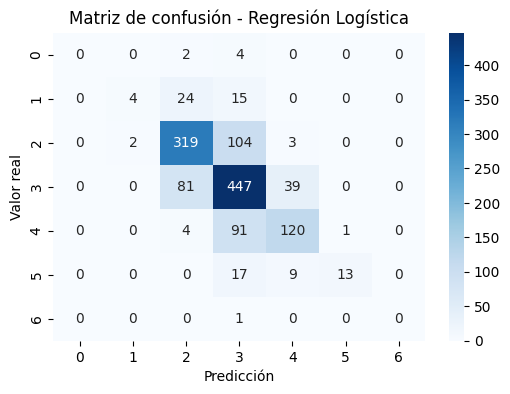

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de confusión - Regresión Logística")
plt.show()


La matriz de confusión revela que la mayoría de los errores se producen entre calidades adyacentes, especialmente entre las clases 5 y 6, y entre 6 y 7.

Este comportamiento es razonable desde el punto de vista del dominio del problema, ya que las diferencias fisicoquímicas entre vinos de calidades cercanas suelen ser sutiles, incluso para catadores humanos.

No obstante, las clases extremas tienden a ser absorbidas por las clases centrales, lo que refuerza el impacto negativo del desequilibrio de clases.

---

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros. El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros. Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [21]:
target_reg = "alcohol"

X_reg = df.drop(columns=[target_reg])
y_reg = df[target_reg]


In [22]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)


In [23]:
#Escalado
scaler_reg = StandardScaler()

X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


In [24]:
#Modelos: 
# 
# Regresión lineal

lr_reg = LinearRegression()

scores_lr_reg = cross_val_score(
    lr_reg,
    X_train_reg_scaled,
    y_train_reg,
    cv=5,
    scoring="neg_mean_absolute_percentage_error"
)

np.mean(-scores_lr_reg)


np.float64(0.03371305370080495)

In [25]:
#KNN Regressor

knn_reg = KNeighborsRegressor(n_neighbors=7)

scores_knn_reg = cross_val_score(
    knn_reg,
    X_train_reg_scaled,
    y_train_reg,
    cv=5,
    scoring="neg_mean_absolute_percentage_error"
)

np.mean(-scores_knn_reg)


np.float64(0.042475091997193196)

In [26]:
#Random Forest Regressor

rf_reg = RandomForestRegressor(random_state=42)

scores_rf_reg = cross_val_score(
    rf_reg,
    X_train_reg,
    y_train_reg,
    cv=5,
    scoring="neg_mean_absolute_percentage_error"
)

np.mean(-scores_rf_reg)


np.float64(0.026826232165643137)

In [27]:
# Entrenamiento final y evaluación

rf_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_reg.predict(X_test_reg)

print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("MAPE:", mean_absolute_percentage_error(y_test_reg, y_pred_reg))


MAE: 0.2658767145909645
RMSE: 0.4040186322031723
MAPE: 0.025177607638314028


Para el problema de regresión se utiliza MAPE (Mean Absolute Percentage Error) como métrica principal, ya que el objetivo de negocio es minimizar el error porcentual en la estimación del grado alcohólico.

Esta métrica permite interpretar el error de forma relativa y resulta más informativa que métricas absolutas cuando se comparan vinos con distintos niveles de alcohol.

Random Forest Regressor obtiene el mejor resultado en validación cruzada en términos de MAPE, lo que justifica su elección como modelo final.

A diferencia de modelos lineales, Random Forest puede capturar relaciones no lineales entre las variables fisicoquímicas y el grado alcohólico, lo que resulta especialmente útil en este contexto.

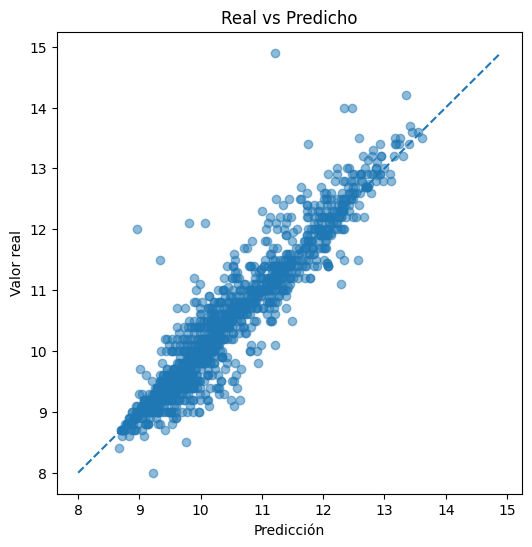

In [28]:
# Análisis de errores (regresión)

# Real vs Predicho

plt.figure(figsize=(6,6))
plt.scatter(y_pred_reg, y_test_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         linestyle="--")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Real vs Predicho")
plt.show()


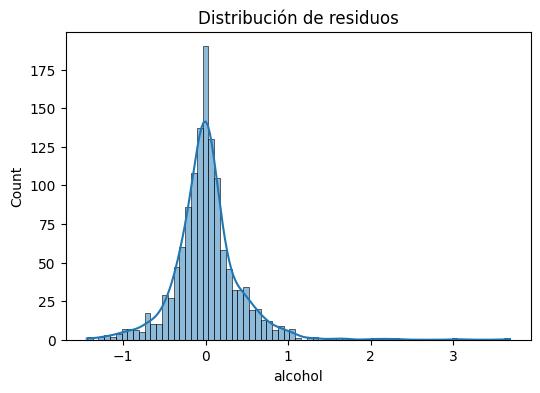

In [29]:
#Residuos

residuos = y_test_reg - y_pred_reg

plt.figure(figsize=(6,4))
sns.histplot(residuos, kde=True)
plt.title("Distribución de residuos")
plt.show()


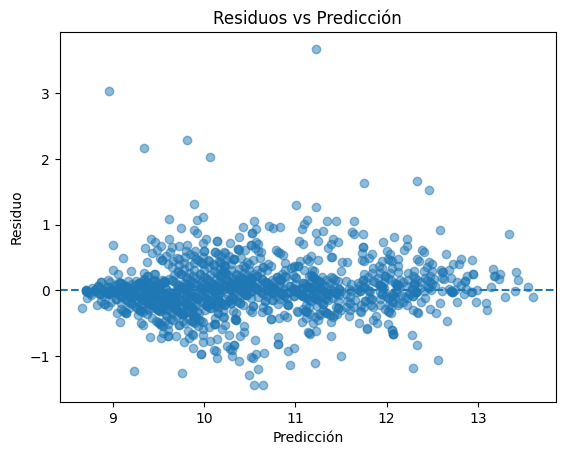

In [30]:
plt.scatter(y_pred_reg, residuos, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicción")
plt.ylabel("Residuo")
plt.title("Residuos vs Predicción")
plt.show()


El análisis de errores muestra que el modelo presenta un error medio bajo, aunque es esperable que el error aumente en vinos con valores de alcohol más extremos.

Un análisis más profundo podría realizarse mediante la visualización de los valores reales frente a los valores predichos o el estudio de los residuos, lo que permitiría detectar posibles patrones de error o sesgos del modelo.